<center><h1>Demo usage</h1></center>

In [1]:
# Get one MIDI recording from the A_MAPS dataset
midi_recording = '../../ASAP_Dataset/Bach_846_perfShi05M.mid'

## Beat tracking from MIDI performance recording

In [2]:
from pm2s.features.beat import RNNJointBeatProcessor
import mir_eval
import pretty_midi as pm

# Create a beat processor
processor = RNNJointBeatProcessor()

# Process the MIDI recording to the beat predictions
beats_pred = processor.process(midi_recording)
# in the format:
# beats: np.ndarray, shape=(n_beats,)
#             beat times

# Ground truth beats
midi_data = pm.PrettyMIDI(midi_recording)
beats_targ = midi_data.get_beats()

# F-measure for beat tracking
beats_pred_trimmed = mir_eval.beat.trim_beats(beats_pred)
beats_targ_trimmed = mir_eval.beat.trim_beats(beats_targ)
f1 = mir_eval.beat.f_measure(beats_targ_trimmed, beats_pred_trimmed)

print('First 10 predicted beats:')
print(beats_pred[:10])
print('First 10 target beats:')
print(beats_targ[:10])
print('F1 score for beat tracking: {}'.format(f1))

First 10 predicted beats:
[ 0.5         1.09505208  2.36458333  3.66276042  4.2890625   5.58854167
  7.49739583  8.63932292  9.81835938 11.04231771]
First 10 target beats:
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
F1 score for beat tracking: 0.17616580310880828


Plot the beat prediction and piano roll for a short segment:

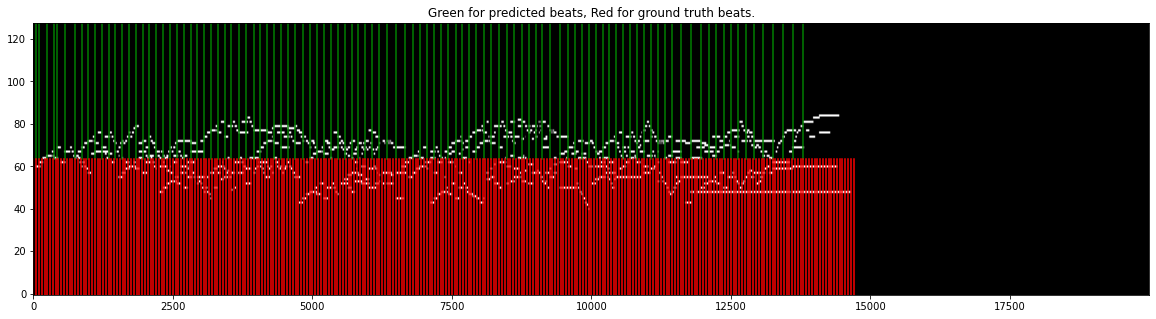

In [3]:
import numpy as np
import pretty_midi as pm
import matplotlib.pyplot as plt

def get_piano_roll(midi_file, start_time, end_time):

    pr = np.zeros((128, int((end_time - start_time) * 100)))

    for instrument in pm.PrettyMIDI(midi_file).instruments:
        for note in instrument.notes:
            if note.start >= end_time or note.end <= start_time:
                continue
            start = int((note.start - start_time) * 100)
            end = int((note.end - start_time) * 100)

            pr[note.pitch, start:end] = 1
    
    return pr

midi_data = pm.PrettyMIDI(midi_recording)
beats_targ = midi_data.get_beats()

start_time, end_time = 0, 200
beats_pred_seg = beats_pred[np.logical_and(beats_pred >= start_time, beats_pred <= end_time)]
beats_targ_seg = beats_targ[np.logical_and(beats_targ >= start_time, beats_targ <= end_time)]
pr_seg = get_piano_roll(midi_recording, start_time, end_time)

plt.figure(figsize=(20, 5))
plt.imshow(pr_seg, aspect='auto', origin='lower', cmap='gray')
for b in beats_pred_seg:
    plt.axvline(x=(b - start_time) * 100, ymin=0.5, ymax=1, color='g')
for b in beats_targ_seg:
    plt.axvline(x=(b - start_time) * 100, ymin=0, ymax=0.5, color='r')
plt.title('Green for predicted beats, Red for ground truth beats.')
plt.show()

## Quantisation from a MIDI performance

In [3]:
from PM2S.pm2s.features.quantisation import RNNJointQuantisationProcessor

# Get one MIDI recording from the A_MAPS dataset
midi_recording = '../ASAP_Dataset/Bach_846_perfShi05M.mid'

# Create a quantisation processor
processor = RNNJointQuantisationProcessor()

# Process the MIDI recording to the beat predictions
beats, onset_positions, note_values = processor.process(midi_recording)
print('onset positions and note values in number of beats:')
print(onset_positions[:20])
print(note_values[:20])

onset positions and note values in number of beats:
[ 1.          2.          3.          3.          4.75        4.875
  4.          4.          5.          6.          7.5         8.
  8.5         9.66666667  9.5        10.         10.04166667 10.33333333
 11.         11.04166667]
[1.         0.83333333 0.875      1.         0.5        0.375
 1.         0.875      1.         1.5        0.5        0.5
 0.33333333 0.33333333 0.5        1.         0.5        0.375
 1.         0.33333333]


In [4]:
for x in note_values:
    print(x*24)

24.0
20.0
21.0
24.0
12.0
9.0
24.0
21.0
24.0
36.0
12.0
12.0
8.0
8.0
12.0
24.0
12.0
9.0
24.0
8.0
12.0
21.0
10.0
12.0
24.0
12.0
18.0
8.0
8.0
24.0
72.0
20.0
26.0
26.0
8.0
12.0
24.0
8.0
21.0
8.0
8.0
8.0
3.0
12.0
24.0
12.0
4.0
8.0
21.0
8.0
6.0
11.0
12.0
24.0
17.0
12.0
24.0
8.0
8.0
8.0
12.0
10.0
9.0
18.0
24.0
22.0
22.0
50.0
24.0
24.0
24.0
13.0
8.0
8.0
12.0
24.0
8.0
6.0
13.0
7.0
8.0
8.0
3.0
24.0
12.0
18.0
48.0
8.0
12.0
26.0
10.0
8.0
24.0
24.0
24.0
12.0
12.0
24.0
21.0
12.0
3.0
9.0
12.0
24.0
24.0
3.0
12.0
6.0
12.0
24.0
72.0
12.0
24.0
36.0
8.0
12.0
24.0
17.0
8.0
12.0
12.0
24.0
2.0
38.0
2.0
24.0
60.0
12.0
6.0
2.0
12.0
42.0
12.0
24.0
8.0
8.0
24.0
8.0
12.0
16.0
8.0
12.0
8.0
24.0
21.0
3.0
14.0
20.0
8.0
6.0
26.0
25.0
12.0
12.0
24.0
2.0
6.0
8.0
24.0
16.0
12.0
12.0
24.0
8.0
12.0
18.0
6.0
12.0
24.0
12.0
8.0
8.0
48.0
24.0
12.0
24.0
8.0
12.0
24.0
24.0
12.0
48.0
12.0
8.0
48.0
8.0
8.0
16.0
8.0
2.0
14.0
48.0
8.0
8.0
17.0
8.0
24.0
24.0
24.0
8.0
8.0
12.0
12.0
2.0
9.0
6.0
24.0
96.0
13.0
12.0
36.0
8.0
12.0
48.0
8

## Hand part prediction

In [5]:
from pm2s.features.hand_part import RNNHandPartProcessor

# Create a hand part prediction processor
processor = RNNHandPartProcessor()
# Get one MIDI recording from the A_MAPS dataset
midi_recording = '../../ASAP_Dataset/Bach_846_perfShi05M.mid'

# Predict hand part for each note in the MIDI recording
hand_parts = processor.process(midi_recording)

print(hand_parts[:20])

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1]


## Time, key signature prediction

In [6]:
from pm2s.features.time_signature import RNNTimeSignatureProcessor
from pm2s.features.key_signature import RNNKeySignatureProcessor

# Get one MIDI recording from the A_MAPS dataset
midi_recording = '../../ASAP_Dataset/Bach_846_perfShi05M.mid'

# Create time and key processors
processor_time_sig = RNNTimeSignatureProcessor()
processor_key_sig = RNNKeySignatureProcessor()

# Prediction
time_signature_changes = processor_time_sig.process(midi_recording)
key_signature_changes = processor_key_sig.process(midi_recording)

print("Time signature changes:")
print(time_signature_changes)
print("\nKey signature changes:")
print(key_signature_changes)

Time signature changes:
[(0.5, '3/8')]

Key signature changes:
[(0.5, 'C')]
